Import Python libraries

In [78]:
from rdkit import Chem
from rdkit.Chem import PandasTools,Draw
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

Necessary setup for SVG images

In [30]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

Load the SDF that was output by transformer_search.py

In [31]:
df = PandasTools.LoadSDF("out.sdf")

Draw the molecule pairs.  Change molsPerRow and subImgSize to make images bigger

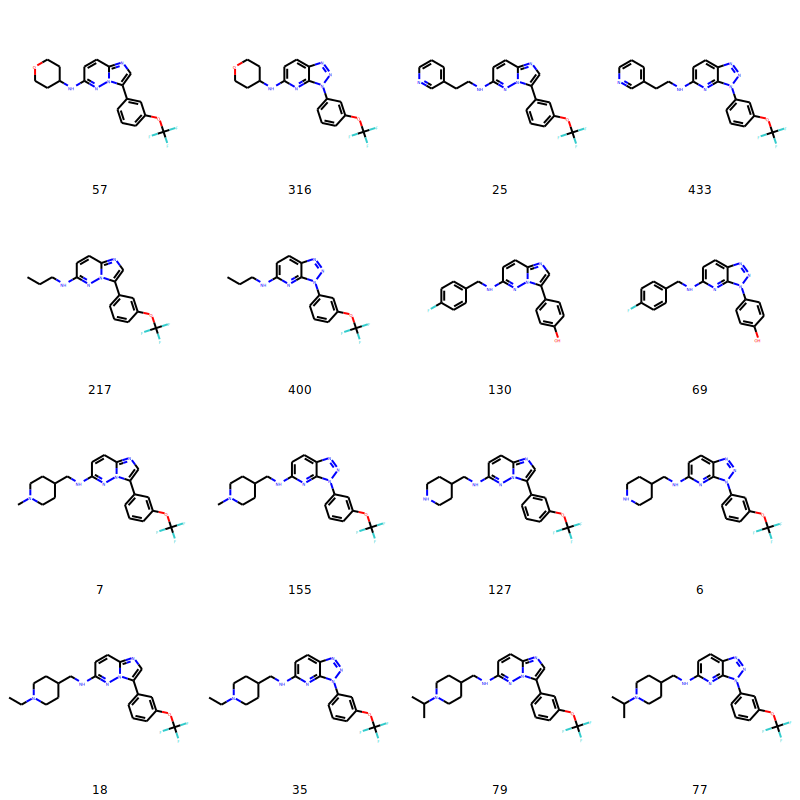

In [40]:
Draw.MolsToGridImage([x for x in df.ROMol],molsPerRow=4,legends=["%.0f" % float(x) for x in df.Value],subImgSize=(200, 200))

Set up data for plotting

In [66]:
ip = [float(x[1]) for x in enumerate(df.Value) if x[0] % 2 == 0]
tp = [float(x[1]) for x in enumerate(df.Value) if x[0] % 2 == 1]
x = ["IP"]* len(first) + ["TP"] * len(second)
y = ip + tp

Make a plot comparing the PIM1 IC50 for the two scaffolds being considered
```
IP = imidazo[1,2‐b]pyridazine
TP = 3H‐[1,2,3]triazolo[4,5‐b]pyridine
```

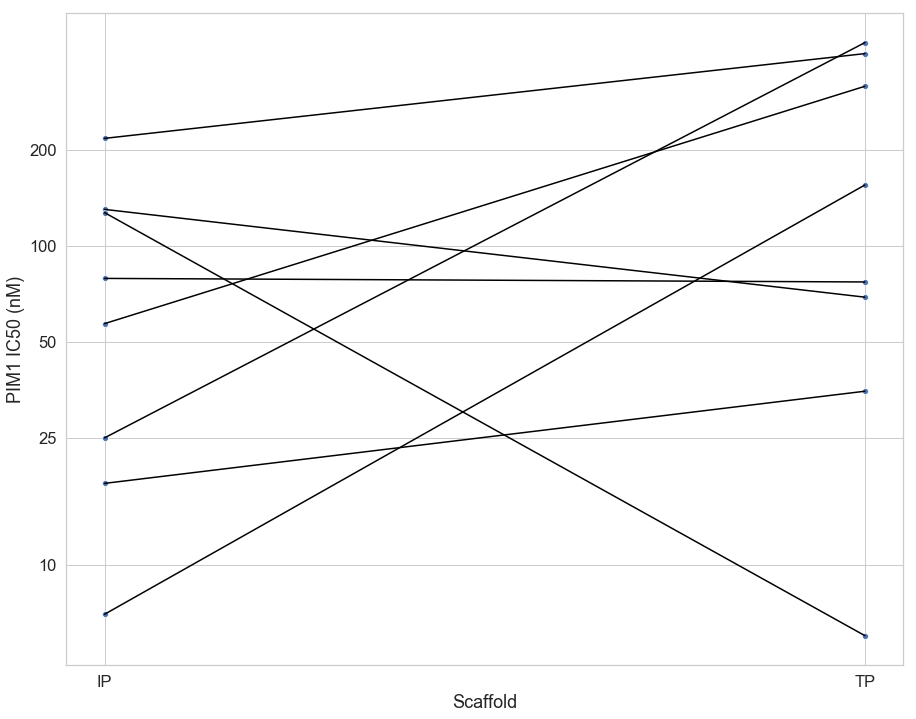

In [85]:
sns.set(rc={'figure.figsize': (15, 12)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.scatterplot(x,y)
ax.set(xlabel="Scaffold",ylabel="PIM1 IC50 (nM)")
ax.set_yscale('log')
ax.set_yticks([0,10,25,50,100,200])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
for f,s in zip(first,second):
    plt.plot([0,1],[f,s],color="black")